# <span style='color:orange'>GRIP FEB'21</span><span style='color:blue'> @ The Sparks Foundation</span>

# Task 1: Prediction using Supervised ML
## <span style='color:red'>**Predict the percentage of a student based on the no. of study hours.**</span>

## BY-TEENA BATRA
### IMPORTING THE LIBRARIES

In [1]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#READING DATA
#Following command imports the CSV dataset using pandas
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data Imported Successfully ")


Data Imported Successfully 


In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25



# Data Insights
### Let's explore the data a little bit 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Cleaning

In [7]:
#To check whether null value is present or not
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

#### From the above script, we know that there is no null value in the dataset so, we can proceed with the visualization.

# Plotting the dataset


Let's plot the data point on the 2D graph to eyeball our dataset and see if we can manually find any relation between 
the data using the below script:

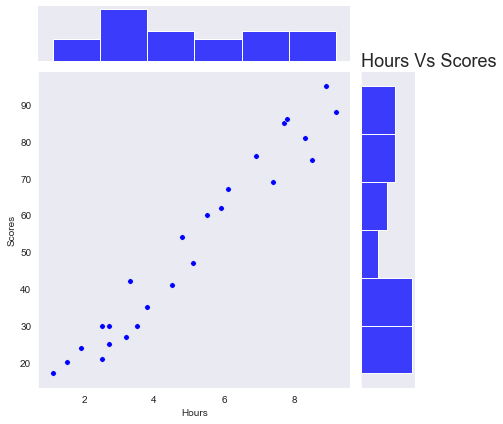

<Figure size 288x288 with 0 Axes>

In [8]:
#Joint plot:
sns.set_style("dark")
sns.jointplot(x='Hours',y='Scores',data=df,color="blue",s=30)
sns.set_context("talk")
plt.title("Hours Vs Scores",loc='left')
plt.figure(figsize=(4,4))
plt.show()

From the above graph,We can clearly see that the there is a positive linear relation between no. of hours studied and scores obtained.


In [9]:
# To divide the data into "attributes" and "labels"
# Attributes are independent variable while labels are dependent variable

X=df.iloc[:,:-1].values
y=df.iloc[:,1].values



# Spliting data into training and testing sets
#### Next, we split 80% of the data to the training set and 20% of the data to the testing set

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
print("Training data")
print(X_train)
print("Testing data:")
print(X_test)

Training data
[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
Testing data:
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Training the Algorithm


In [12]:
from sklearn.linear_model import LinearRegression

#NOW, IMPORT THE lINEARREGRESSION CLASS, INSTANTIATE IT AND CALL THE FIT() METHOD ALONG WITH THE TRAINING DATA.
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("Training Complete")

Training Complete


In [13]:
# to retrieve the slope:
regressor.coef_

array([9.91065648])

In [14]:
# to retrieve the intercept:
regressor.intercept_

2.018160041434662

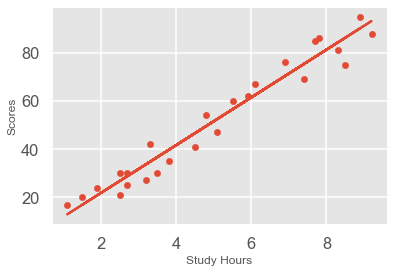

In [15]:
#Plotting the regression line
line=regressor.coef_*X+regressor.intercept_

#Plotting the test data

plt.style.use("ggplot")
plt.scatter(X,y,s=40)
plt.plot(X,line)
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.show()

# Making Predictions

In [16]:
print(X_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


As we have trained our data, lets make the prediction on the test data.

In [17]:
y_pred=regressor.predict(X_test)

### Comparing Actual Vs Predicted

In [18]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


We can also visualize comparison result as a bar graph using below script:

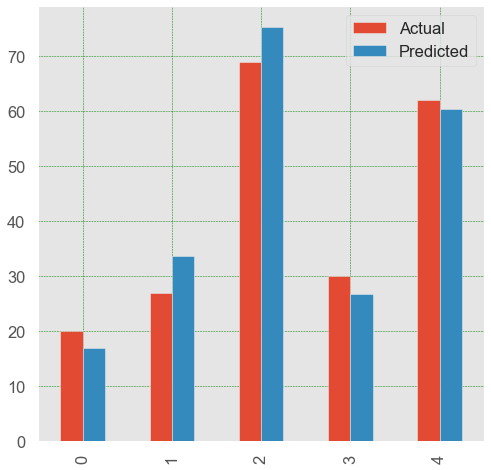

In [19]:
df1.plot(kind='bar',figsize=(8,8))
plt.grid(which='major',linestyle='--',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='blue')  
plt.show()

In [20]:
regressor.score(X_test,y_test)

0.9454906892105354

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
hours=9.25
own_pred=regressor.predict(np.array(hours).reshape(1,1))
print("No. of Hours is {}".format(hours))
print("Predicted Score is {}".format(own_pred[0]))

No. of Hours is 9.25
Predicted Score is 93.69173248737539


## Evaluate the performance of the algorithm

This step is important as it compares how well different algorithm perform on a particular dataset.
For regression algorithm, three evaluation metrics are commonly used:
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error 

In [22]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error:  4.183859899002982


In [23]:
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error:  21.598769307217456


In [24]:
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Root Mean Squared Error:  2.0454485813637513
